# Support Vector Machines - SVM - Project Section

În continuare o să încercăm să utilizăm conceptele învățate din SVMs pentru a crea un model de clasificare care să ne spună dacă anumite vinuri sunt contrafăcute în funcție de anumite măsurători chimice efectuate pe o serie de sticle de vin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/DATA/wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

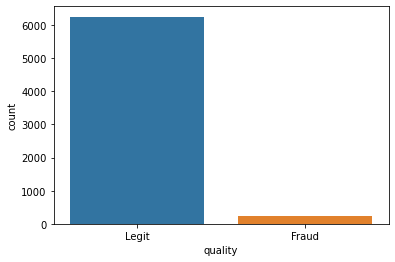

In [8]:
sns.countplot(x='quality', data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

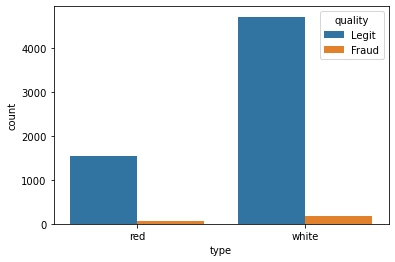

In [9]:
sns.countplot(x='type', data=df, hue='quality')

In [10]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


<AxesSubplot:>

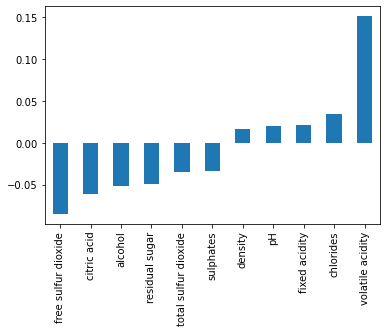

In [15]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

In [16]:
df = df.drop('Fraud', axis=1)

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [18]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [20]:
X = df.drop('quality', axis=1)
y = df['quality']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC(class_weight='balanced')

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 2]}
grid_model = GridSearchCV(model, param_grid)

In [29]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2]})

In [30]:
grid_model.best_params_

{'C': 2}

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [32]:
y_pred = grid_model.predict(X_test)

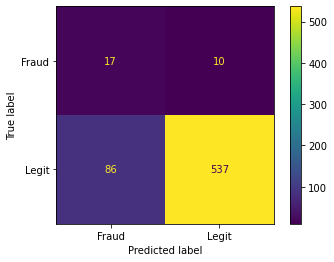

In [34]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[ 17,  10],
       [ 86, 537]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.17      0.63      0.26        27
       Legit       0.98      0.86      0.92       623

    accuracy                           0.85       650
   macro avg       0.57      0.75      0.59       650
weighted avg       0.95      0.85      0.89       650

